First, load the data, from the supplied data file

In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv("restaurant_data.csv")
display(data.head())
data.describe()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,60.529713,43.951230,2.569672
std,638.930907,639.930932,0.951100
min,-20.760000,-2.240000,1.000000
25%,13.277500,2.000000,2.000000
50%,17.795000,2.960000,2.000000
75%,24.332500,3.602500,3.000000
max,9999.000000,9999.000000,6.000000


# Cleaning

The data had some some strange things in. Write down all of the strange things that you found here:

### I found the following strange things:
* Column sex has 2 different ways of describing whether is male or female. 
* In our dataset days might be present as abbreviations (Sun, Thur) or written in full like Thursday 
* Total_bill and tip columns are values representing amount of money which cannot be negative as the transaction always goes from the 'client' to the 'restaurant' in our case
* Unreasonaby high values in total_bill and tip column 

Now, clean the data. Use a separate cell for each operation, and use a text cell to explain _why_ you are doing each operation

First, I am removing all of the 'X' from the data. This is because 'Y'

In [7]:
# Cleaning code goes in here
#First make all numbers positive as negative values might just be human mistakes
f = lambda x: abs(x)
data[['tip','total_bill']] = data[['tip','total_bill']].apply(f) 
#Then check if the values are within the expected range and remove outliers 
#Expected range is equal to 10 times the mean value
data = data.drop(data.loc[data['total_bill']>500].index).reset_index(drop=True)
data = data.drop(data.loc[data['tip']>50].index).reset_index(drop=True)

Next, I am changing all of the P to Q

In [8]:
# More cleaning code goes in here
#Replace Man and Woman values with Male and Female
f = lambda x: 'Male' if (x=='Man'  or x=='Male')   else 'Female'
data['sex'] = data['sex'].apply(f) 
#Replace Thursday with Thur
f = lambda x: 'Thur' if (x=='Thursday') else x
data['day'] = data['day'].apply(f) 

Now that your data is clean, use some assert statements to check that it fits your picture of how the data should be. Make sure each assert explains why it is there. You should have several asserts, for all of the things that you found in the data that were strange.

In [9]:
assert (data['tip'].values>= 0).all(), "All tips must be non-negative values" 
assert (data['total_bill'].values>= 0).all(), "All bills  must be non-negative values"
assert (data['total_bill'].values<=500).all(), "Bill out of expected range"
assert (data['tip'].values<=40).all(), "Tip out of expected range"
assert (data['size'].values >=1).all(), "Size must be bigger than 1"
assert data['sex'].isin(['Male', 'Female']).all(), "Sex can only be Male or Female" 
assert data['day'].isin(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']).all(), "Days maybe in different format"
assert data['smoker'].isin(['Yes', 'No']).all(), "Yes or No....just pick one"
assert data['time'].isin(['Dinner', 'Lunch']).all(), "Restaurant only open for Dinner and Lunch"

# Simple Statistical Questions
For each of these, we want a command that just prints the relevant answer. The first one has been filled out as an example


How many rows are in the dataset after cleaning?

In [10]:
rows_num=data.shape[0] # Simply count the number of rows using shape, and select the first element
print(rows_num)

243


What is the total amount of tips given?

In [11]:
total_tips=np.sum(data['tip'])
print(total_tips)

729.5799999999999


What is the largest group?

In [12]:
largest_group=data['size'].max()
print(largest_group)

6


How many bills were paid by males, and how many by females?

In [13]:
bills=data['sex'].value_counts()
print("Men paid the bill ",bills[0],' times while Women paid ',bills[1],' times')

Men paid the bill  156  times while Women paid  87  times


What is the average percentage of the bill that people add as a tip?

In [14]:
#We calculate the tip percentage as (tip/total_bill)*100 and then add this column to the dataFrame
myFrame = data[['total_bill','tip']]
tip=[]
for ind,row in myFrame.iterrows():
    tip_percentage = round(float(row[1]/row[0])*100,2)
    tip.append(tip_percentage)
myFrame = pd.DataFrame(tip, columns=['tip percentage %'])
data = pd.merge(data,myFrame,left_index=True, right_index=True)
average_percentage=np.mean(data['tip percentage %'])
print('The average percentage is ',average_percentage,'%')

The average percentage is  16.094485596707838 %


What is the largest tip?

In [15]:
max_tip=data['tip'].max()
print(max_tip)

10.0


What day of the week was the largest tip given on?

In [16]:
data['day'].loc[data['tip'].idxmax()]

'Sat'

Do males or females give more tips as an average of the bill? What is the difference?

In [17]:
men_av_tip = np.mean(data.loc[data['sex']=='Male']['tip percentage %'])
women_av_tip=np.mean(data.loc[data['sex']=='Female']['tip percentage %'])
difference = men_av_tip - women_av_tip
if (difference < 0):
    print("Women tip more than men by an average of",abs(difference),'percent')
elif (difference>0): 
    print("Men tip more than women by an average of",abs(difference),'percent')
else: print('Tip percentages are the same across Men and Women')

Women tip more than men by an average of 0.862634836427933 percent


Do smokers tip more at lunchtime than at dinnertime?

In [18]:
myFrame = data.loc[data['smoker']=='Yes']
smoker_tip_dinner = np.mean(data.loc[data['time']=='Dinner']['tip'])
smoker_tip_lunch = np.mean(data.loc[data['time']=='Lunch']['tip'])
if ((smoker_tip_dinner - smoker_tip_lunch)>0): print("Smokers tip more at dinnertime")
else: print("Smokers tip more at lunchtime")

Smokers tip more at dinnertime


# Graphs
For all these questions, use a graph to illustrate your answer

What is the distribution of tips, and what is the distribution of total bills (plot on separate graphs). Hint: distplot

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


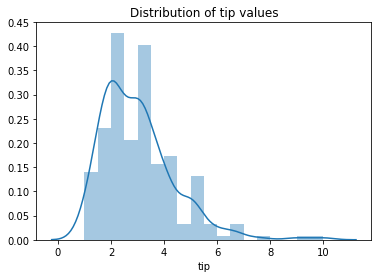

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
tip_chart = sns.distplot(data['tip'])
tip_chart.set_title('Distribution of tip values')
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


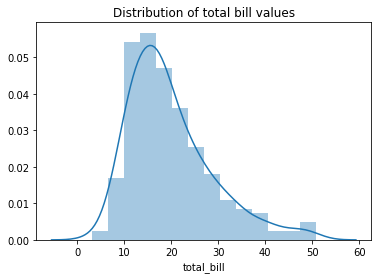

In [20]:
billing_chart = sns.distplot(data['total_bill'])
billing_chart.set_title('Distribution of total bill values')
plt.show()

Now plot them on the *same* plot, and add a legend. Hint: use attribute 'label' to give them names, and call legend() on one of the plots to draw the legend

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


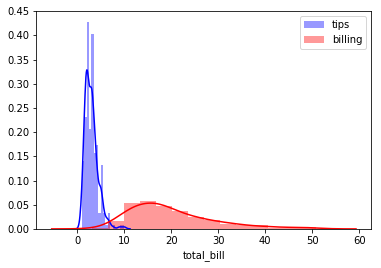

In [21]:
plt.figure("Distributions")
sns.distplot(data['tip'], label='tips', color='b')
sns.distplot(data['total_bill'], label='billing', color='r')
plt.legend()

Do people give different average tips on different days? (Have you calculated this relative to the size of the bill, or just the tip amount?) Hint: boxplot

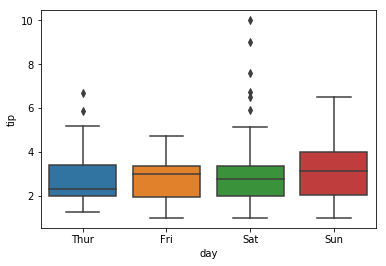

In [22]:
sns.boxplot(x=data['day'],y=data['tip'], order=["Thur", "Fri", 'Sat', 'Sun'])

How does the size of the tip relate to the size of the bill? Hint: scatterplot, lmplot

###### It can be observed that, in general, the tip increaces as the bill grows. Using linear regression we found the model that best fits our data which is a strictly increasing function.

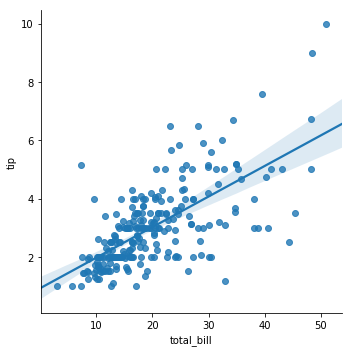

In [23]:
myFrame=data
sns.lmplot(x='total_bill', y='tip', data=myFrame)

Does the proportion of the bill given as a tip relate to the number of people eating?

###### As can be observed from the histogram below the proportion of the bill given as a tip does not relate to the size of the group. We expected that result as the bill is proportional to the number of people eating and the tip is proportial to the bill, as well, and there is no correlation between the two values.

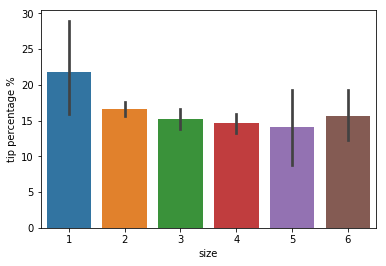

In [24]:
sns.barplot(x='size', y='tip percentage %', data=data)

Bonus Question: Create a boxplot showing total bills and tips for each day next to each other in a different colour.

Hint: use melt (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) to reshape the data, so that you have new dataset, with a column for the day, a column for the amount, and a type column that says whether it is a total_bill or a tip. Then you can boxplot that, and use the type column to set the color.

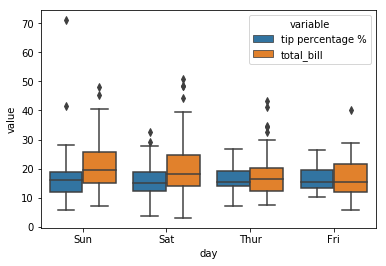

In [25]:
# The plot below shows total bills and tip percentage as the difference between their values is not as big as the difference between tip and total bill. As a result the plot seems 
#to be easier to read
dataFrame = data[['day', 'tip percentage %', 'total_bill']]
dataFrame = pd.melt(dataFrame, id_vars=['day'])
sns.boxplot(x='day', y='value', hue='variable', data=dataFrame)

# Open Question
Use 2 graphs and associated text to explain something else that you have found in the data. Try to relate it to causes, i.e. explain *why* the data might be this way.

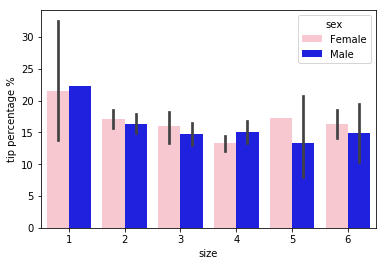

In [26]:
sns.barplot(x='size', y='tip percentage %', hue='sex',palette=['pink','blue'], data=data)#, order=['Thur', 'Fri', 'Sat', 'Sun'])

###### The bar plot above shows the tip percentage against size for Men and Women. We can see tha in general women give a higher proportion of the bill as a tip when they pay the bill. 

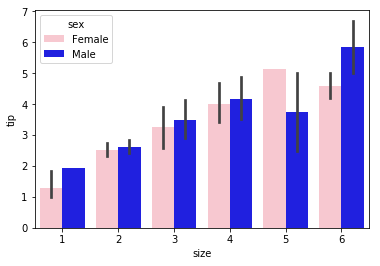

In [27]:
sns.barplot(x='size', y='tip', hue='sex',palette=['pink','blue'], data=data)

###### The graph above demonstrates the tip being paid by men and women as the size of group increases.An important observation is that men as individuals(grous size 1) tip better than women. Men in general tip more when they pay the bill but with lower average percentage of the total bill.  

# Reflection
Write up to 100 words about your experience and what you have learnt

I realized that to accomplish such a task with minimum lines of code and complexity I should know how to handle dataframes that pandas library uses. Also, as I was moving along the questions I faced many different problems as my assert stamements were not well defined and I had to deal with many situations that my data had values that, normally, should not be there. At tha point, it became clear to me that I had to start over and create a cleaned DataFrame which took most of my time in order to check every different case that could cause a problem in my data analysis.When my Dataframe was finally cleaned, applying statistics on my data was easy as I had already been familiarized with Dataframe manipulation.

The next part of this exercise was about visualising our data which is one the most important tasks as different graphs provide information on our data that cannot be extracted easily by just calculating different values of our data representation.